In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [2]:
canv = ROOT.TCanvas("canv","canv",900,450)
im  = ROOT.RooRealVar("im" ,"im" , 2.24, 2.33)

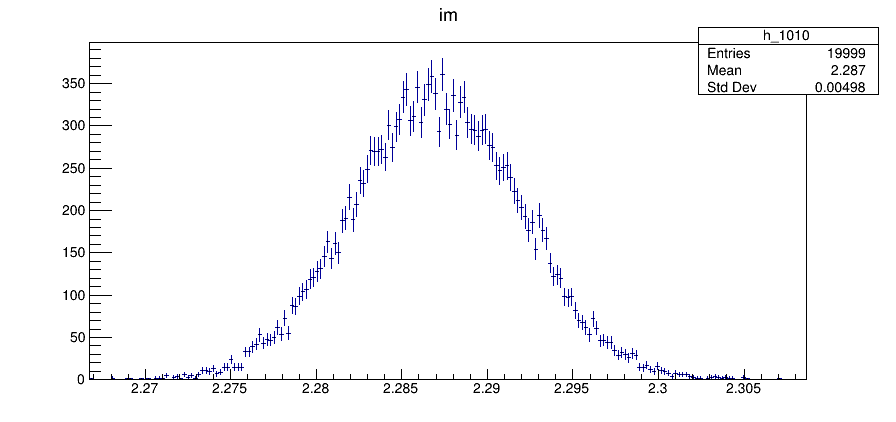

In [3]:
sig = Models.Gauss_pdf("sig",xvar=im,mean=(2.287),sigma=(0.005))
large_ds = sig.generate(20000)
large_ds.draw("im")
canv.Draw()


  RooFitResult: minimized FCN value: -77656.8, estimated distance to minimum: 1.16642e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
             mean_sigF    2.2870e+00    2.2870e+00 +/-  3.52e-05  0.000039
            sigma_sigF    5.0000e-03    4.9826e-03 +/-  2.49e-05  0.000039




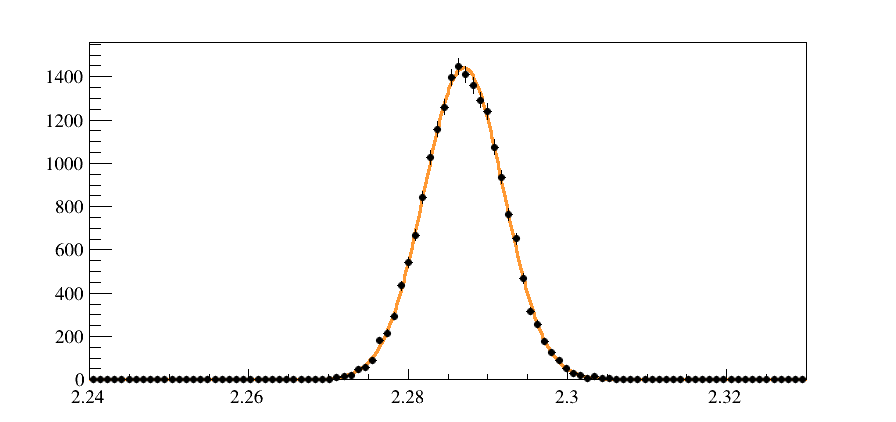

In [4]:
sigF = Models.Gauss_pdf("sigF",xvar=im,mean=(2.287,2.280,2.294),sigma=(0.005,0.0001,0.015))
r,w = sigF.fitTo(large_ds, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()

0
20
40
60
80


Warning in <TROOT::Append>: Replacing existing TH1: h_sigma (Potential memory leak).


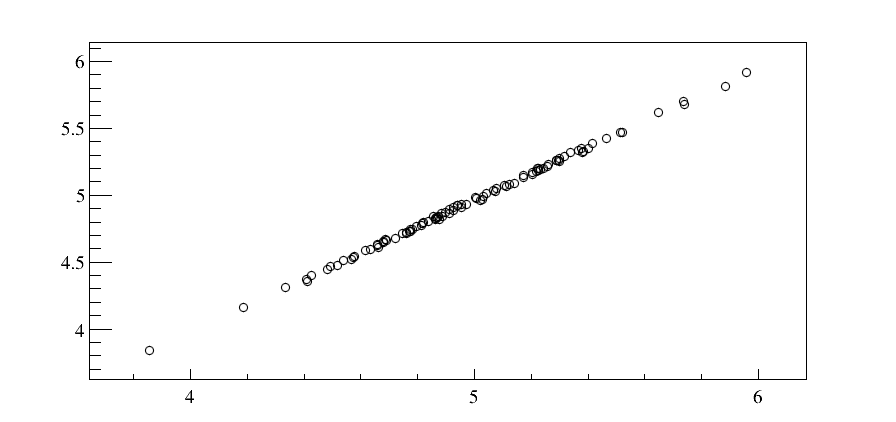

In [9]:
Nmc = 100
B=1000
argset = ROOT.RooArgSet( im )
dsb = ROOT.RooDataSet("dsb","bootstrap ds", argset)
h_sigma = ROOT.TH1F("h_sigma",";#sigma, MeV;entries",250,0,25)
sg_fit  = []
sg_boot = []
s_sg_fit  = []
s_sg_boot = []
for mc in range(Nmc):
    if not mc%20:
        print(mc)
    small_ds = sig.generate(100)
    r,w = sigF.fitTo(small_ds, draw=False, silent=True)
    sg_fit  .append( 1000.*r("sigma_sigF")[0].value() )
    s_sg_fit.append( 1000.*r("sigma_sigF")[0].error() )
    Nev=len(small_ds)
    h_sigma.Reset()
    for b in range(B):
        dsb.reset()
        for jj in range(Nev):
            im.setVal( small_ds[ROOT.gRandom.Integer(Nev)]["im"].value )
            dsb.add( argset )
        r,w = sigF.fitTo(dsb, draw=False, silent=True)
        h_sigma.Fill(1000.*r("sigma_sigF")[0].value())
    sg_boot  .append( h_sigma.mean() ) 
    s_sg_boot.append( h_sigma.rms()  )
gr = makeGraph(sg_fit,sg_boot)
gr.SetMarkerStyle(24)
gr.Draw("AP")
canv.Draw()

 FCN=2168.65 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=1.0512e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -4.29980e-02   1.05759e-02   1.76803e-05   1.01368e+00
   2  p1           7.84227e-02   2.15739e-03   3.60672e-06   4.39155e+00


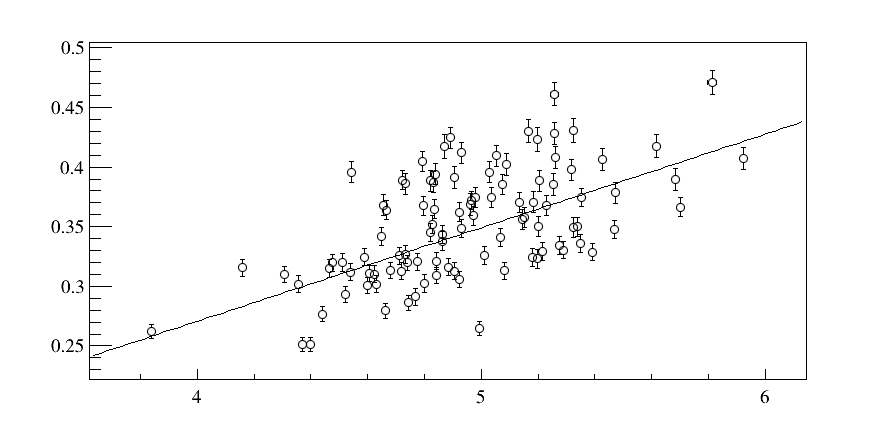

In [12]:
grs = makeGraph(sg_boot,s_sg_boot)
grs.SetMarkerStyle(24)
grs.Draw("AP")
grs.Fit("pol1")
canv.Draw()

In [13]:
coverage = 0
for ii in range(len( sg_boot) ):
    if (sg_boot[ii]-s_sg_boot[ii])<5:
        if (sg_boot[ii]+s_sg_boot[ii])>5:
            coverage +=1
print(coverage)

69


0
200
400
600
800


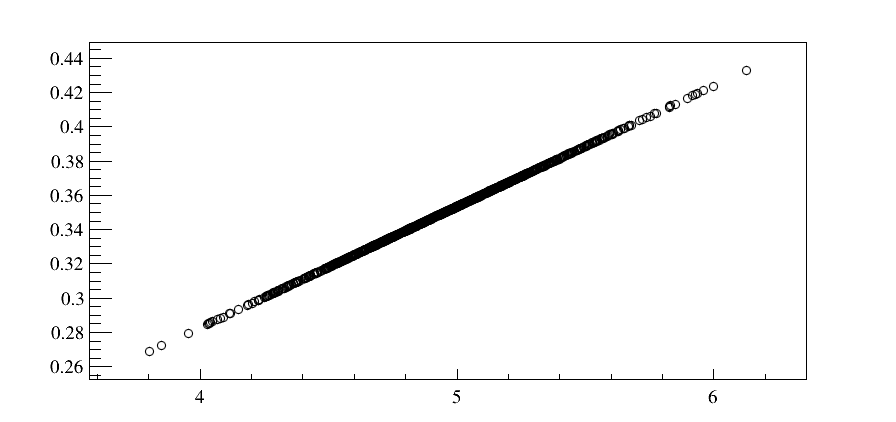

In [14]:
Nmc = 1000
sg_fit  = []
s_sg_fit  = []
for mc in range(Nmc):
    if not mc%200:
        print(mc)
    small_ds = sig.generate(100)
    r,w = sigF.fitTo(small_ds, draw=False, silent=True)
    sg_fit  .append( 1000.*r("sigma_sigF")[0].value() )
    s_sg_fit.append( 1000.*r("sigma_sigF")[0].error() )
grf = makeGraph(sg_fit,s_sg_fit)
grf.SetMarkerStyle(24)
grf.Draw("AP")
canv.Draw()

In [15]:
coverage = 0
for ii in range(len( sg_fit) ):
    if (sg_fit[ii]-s_sg_fit[ii])<5:
        if (sg_fit[ii]+s_sg_fit[ii])>5:
            coverage +=1
print(coverage/10.)

68.7


( 3.4974 +- 0.0224126 )

3.5554673381941164

24166

(( 0.00351545 +- 0.00023462 ), 'sigma_sig' : ( 0.00351545 +- 0.00023462 ) )
